In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [4]:
df_min=df[df['9']==1]

In [5]:
df_min.to_csv('wisconsin_minority_train.csv',index=False)
df_min=pd.read_csv('wisconsin_minority_train.csv')

In [6]:
df_majority=df[df['9']==0]
df_majority.to_csv('wisconsin_majority_train.csv',index=False)
df_majority=pd.read_csv('wisconsin_majority_train.csv')

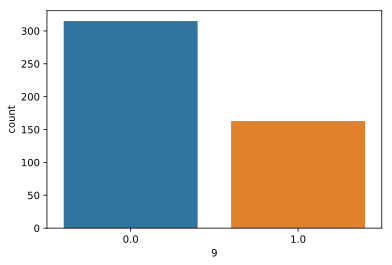

In [7]:
%matplotlib inline
sns.countplot(x='9',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(157, 5, 10)
(157, 10)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(10))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 2,690
Trainable params: 2,690
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
94/94 [==============================] - 3s 31ms/step - loss: 0.2876
Epoch 2/500
94/94 [==============================] - 0s 555us/step - loss: 0.2674
Epoch 3/500
94/94 [==============================] - 0s 565us/step - loss: 0.2461
Epoch 4/500
94/94 [==============================] - 0s 651us/step - loss: 0.2238
Epoch 5/500
94/94 [==============================] - 0s 565us/step - loss: 0.2028
Epoch 6/500
94/94 [==============================] - 0s 565us/step - loss: 0.1830
Epoch 7/500
94/94 [==============================] - 0s 565us/step - loss: 0.1639
Epoch 8/500
94/94 [==============================] - 0s 576us/step - loss: 0.1471
Epoch 9/500
94/94 [==============================] - 0s 587us/step - loss: 0.1325
Epoch 10/500
94/94 [==============================] - 0s 565us/step - loss: 0.1196
Epoch 11/500
94/94 [==============================] - 0s 587us/step - loss: 0.1110
Epoch 12/500
94/94 [==============================] - 0s 683us/step - loss: 0.1036
Epoch 13/500
9

94/94 [==============================] - 0s 592us/step - loss: 0.0826
Epoch 100/500
94/94 [==============================] - 0s 592us/step - loss: 0.0825
Epoch 101/500
94/94 [==============================] - 0s 592us/step - loss: 0.0825
Epoch 102/500
94/94 [==============================] - 0s 560us/step - loss: 0.0824
Epoch 103/500
94/94 [==============================] - 0s 555us/step - loss: 0.0823
Epoch 104/500
94/94 [==============================] - 0s 544us/step - loss: 0.0823
Epoch 105/500
94/94 [==============================] - 0s 491us/step - loss: 0.0821
Epoch 106/500
94/94 [==============================] - 0s 555us/step - loss: 0.0821
Epoch 107/500
94/94 [==============================] - 0s 523us/step - loss: 0.0820
Epoch 108/500
94/94 [==============================] - 0s 562us/step - loss: 0.0819
Epoch 109/500
94/94 [==============================] - 0s 597us/step - loss: 0.0819
Epoch 110/500
94/94 [==============================] - 0s 592us/step - loss: 0.0818
Epoch 

94/94 [==============================] - 0s 629us/step - loss: 0.0768
Epoch 197/500
94/94 [==============================] - 0s 629us/step - loss: 0.0767
Epoch 198/500
94/94 [==============================] - 0s 695us/step - loss: 0.0767
Epoch 199/500
94/94 [==============================] - 0s 693us/step - loss: 0.0767
Epoch 200/500
94/94 [==============================] - 0s 720us/step - loss: 0.0766
Epoch 201/500
94/94 [==============================] - 0s 629us/step - loss: 0.0766
Epoch 202/500
94/94 [==============================] - 0s 709us/step - loss: 0.0765
Epoch 203/500
94/94 [==============================] - 0s 635us/step - loss: 0.0766
Epoch 204/500
94/94 [==============================] - 0s 565us/step - loss: 0.0764
Epoch 205/500
94/94 [==============================] - 0s 576us/step - loss: 0.0766
Epoch 206/500
94/94 [==============================] - 0s 576us/step - loss: 0.0764
Epoch 207/500
94/94 [==============================] - 0s 549us/step - loss: 0.0764
Epoch 

94/94 [==============================] - 0s 661us/step - loss: 0.0723
Epoch 294/500
94/94 [==============================] - 0s 672us/step - loss: 0.0721
Epoch 295/500
94/94 [==============================] - 0s 786us/step - loss: 0.0721
Epoch 296/500
94/94 [==============================] - 0s 656us/step - loss: 0.0720
Epoch 297/500
94/94 [==============================] - 0s 693us/step - loss: 0.0720
Epoch 298/500
94/94 [==============================] - 0s 592us/step - loss: 0.0718
Epoch 299/500
94/94 [==============================] - 0s 651us/step - loss: 0.0719
Epoch 300/500
94/94 [==============================] - 0s 603us/step - loss: 0.0718
Epoch 301/500
94/94 [==============================] - 0s 587us/step - loss: 0.0717
Epoch 302/500
94/94 [==============================] - 0s 544us/step - loss: 0.0717
Epoch 303/500
94/94 [==============================] - 0s 544us/step - loss: 0.0716
Epoch 304/500
94/94 [==============================] - 0s 512us/step - loss: 0.0715
Epoch 

94/94 [==============================] - 0s 437us/step - loss: 0.0666
Epoch 391/500
94/94 [==============================] - 0s 437us/step - loss: 0.0666
Epoch 392/500
94/94 [==============================] - 0s 443us/step - loss: 0.0665
Epoch 393/500
94/94 [==============================] - 0s 501us/step - loss: 0.0663
Epoch 394/500
94/94 [==============================] - 0s 421us/step - loss: 0.0663
Epoch 395/500
94/94 [==============================] - 0s 501us/step - loss: 0.0662
Epoch 396/500
94/94 [==============================] - 0s 619us/step - loss: 0.0662
Epoch 397/500
94/94 [==============================] - 0s 608us/step - loss: 0.0662
Epoch 398/500
94/94 [==============================] - 0s 664us/step - loss: 0.0660
Epoch 399/500
94/94 [==============================] - 0s 565us/step - loss: 0.0661
Epoch 400/500
94/94 [==============================] - 0s 597us/step - loss: 0.0660
Epoch 401/500
94/94 [==============================] - 0s 651us/step - loss: 0.0659
Epoch 

94/94 [==============================] - 0s 683us/step - loss: 0.0601
Epoch 488/500
94/94 [==============================] - 0s 747us/step - loss: 0.0600
Epoch 489/500
94/94 [==============================] - 0s 752us/step - loss: 0.0599
Epoch 490/500
94/94 [==============================] - 0s 619us/step - loss: 0.0598
Epoch 491/500
94/94 [==============================] - 0s 587us/step - loss: 0.0599
Epoch 492/500
94/94 [==============================] - 0s 722us/step - loss: 0.0598
Epoch 493/500
94/94 [==============================] - 0s 805us/step - loss: 0.0597
Epoch 494/500
94/94 [==============================] - 0s 763us/step - loss: 0.0595
Epoch 495/500
94/94 [==============================] - 0s 587us/step - loss: 0.0598
Epoch 496/500
94/94 [==============================] - 0s 619us/step - loss: 0.0594
Epoch 497/500
94/94 [==============================] - 0s 752us/step - loss: 0.0594
Epoch 498/500
94/94 [==============================] - 0s 592us/step - loss: 0.0593
Epoch 

In [14]:
model.save('7-24-2019-wisconsin-v1.h5')

In [15]:
Xtrain.shape

(94, 5, 10)

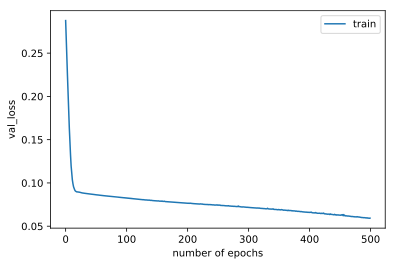

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

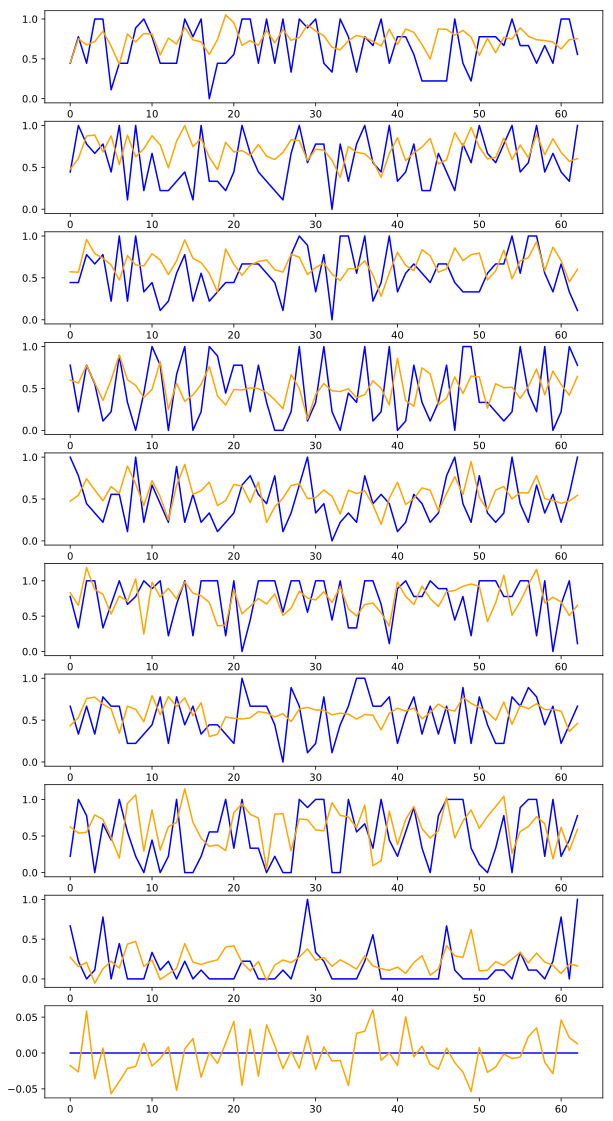

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 4.49354917e-01,  4.77443427e-01,  5.72801054e-01,
         6.00399435e-01,  4.74958748e-01,  8.30368459e-01,
         4.32616949e-01,  6.23522282e-01,  2.72340119e-01,
        -1.75212044e-02],
       [ 7.52294600e-01,  6.05576336e-01,  5.67898035e-01,
         5.64092338e-01,  5.44667780e-01,  6.52740180e-01,
         5.32128632e-01,  5.39551973e-01,  1.54883385e-01,
        -2.63921786e-02],
       [ 6.75214529e-01,  8.73968661e-01,  9.59195256e-01,
         7.76458561e-01,  7.41697967e-01,  1.18527532e+00,
         7.58127570e-01,  5.50792754e-01,  2.07500637e-01,
         5.85668311e-02],
       [ 7.15636611e-01,  8.86757910e-01,  7.89877176e-01,
         5.66594303e-01,  6.06730163e-01,  8.77350688e-01,
         7.74789631e-01,  7.87543714e-01, -5.32743707e-02,
        -3.56626585e-02],
       [ 8.48960698e-01,  6.83423698e-01,  7.34678626e-01,
         3.56360435e-01,  4.78886694e-01,  8.09540987e-01,
         6.89163029e-01,  7.27757931e-01,  1.26181334e-01,
         6.

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

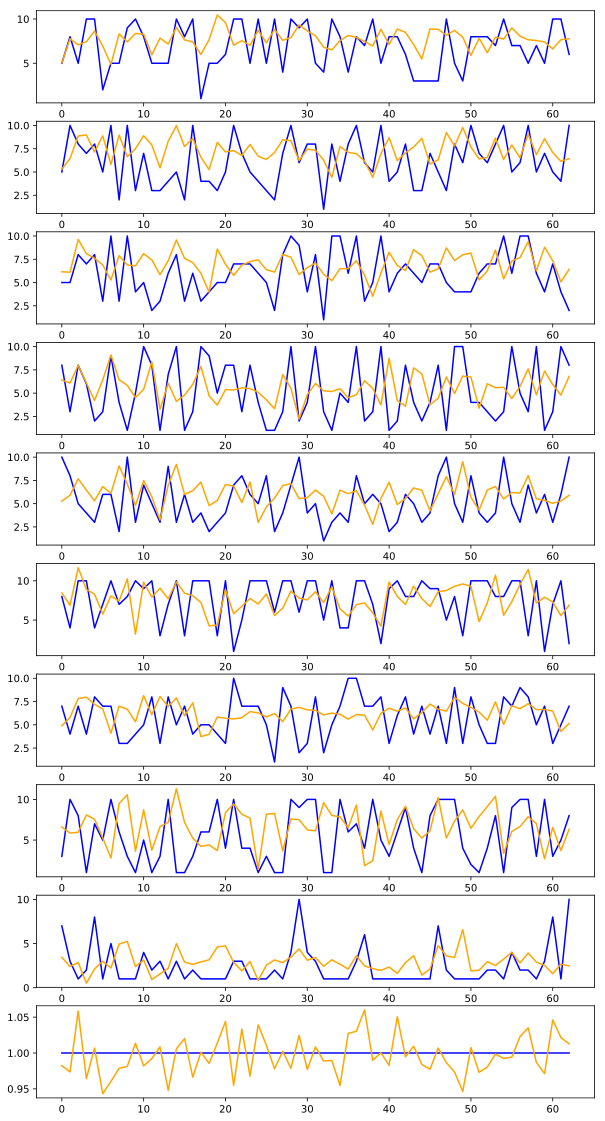

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 4.49354917e-01,  4.77443427e-01,  5.72801054e-01,
         6.00399435e-01,  4.74958748e-01,  8.30368459e-01,
         4.32616949e-01,  6.23522282e-01,  2.72340119e-01,
        -1.75212044e-02],
       [ 7.52294600e-01,  6.05576336e-01,  5.67898035e-01,
         5.64092338e-01,  5.44667780e-01,  6.52740180e-01,
         5.32128632e-01,  5.39551973e-01,  1.54883385e-01,
        -2.63921786e-02],
       [ 6.75214529e-01,  8.73968661e-01,  9.59195256e-01,
         7.76458561e-01,  7.41697967e-01,  1.18527532e+00,
         7.58127570e-01,  5.50792754e-01,  2.07500637e-01,
         5.85668311e-02],
       [ 7.15636611e-01,  8.86757910e-01,  7.89877176e-01,
         5.66594303e-01,  6.06730163e-01,  8.77350688e-01,
         7.74789631e-01,  7.87543714e-01, -5.32743707e-02,
        -3.56626585e-02],
       [ 8.48960698e-01,  6.83423698e-01,  7.34678626e-01,
         3.56360435e-01,  4.78886694e-01,  8.09540987e-01,
         6.89163029e-01,  7.27757931e-01,  1.26181334e-01,
         6.

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)